Ce notebook consiste à faire un nettoyage des datasets concernant les terrains de tennis 

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt

Lecture des datasets 

In [3]:
df1 = pd.read_csv('tennis_courts.csv')
df1.head()

,name,address,city,state,zip_code,type,count,clay,wall,grass,indoor,lights,proshop,latitude,longitude
Northwestern High,Adelphi Road,washington,dc,20782.0,Public,6,False,True,False,False,False,False,38.974351,-76.952112,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
The Park at Canterbury,Brandywood Circle,orlando,fl,32792.0,Homeowners Community,1,False,False,False,False,True,False,28.590956,-81.285224,"{""clay""=>""0"", ""type""=>""Homeowners Community"", ..."
Tippit Middle School,Greenlee Drive,austin-san marcos,tx,78628.0,Public,8,False,True,False,False,True,False,30.615173,-97.700794,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
Lexington Park,McKee Street,minneapolis-st. paul,mn,55121.0,Public,1,False,False,False,False,False,False,44.852096,-93.142100,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."
Rogers Junior School,Avenue North,minneapolis-st. paul,mn,55374.0,Public,6,False,False,False,False,False,False,45.207841,-93.544174,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."


In [9]:
df2 = pd.read_csv('gps-tennis-courts.csv')
df2.head()

,"Complex_Na,C,110","Complex_Ty,C,36","Facility_N,C,146","Facility_T,C,34","Bookable_I,C,146","Assessment,C,18","F8,C,1","Number,N,19,11","Road_Name,C,88","Locality,C,34",...,"Home_Clubs,C,254","Hours_of_O,C,30","Descriptio,C,254","Amenities,C,254","Hire_Agree,C,254","Availabili,C,70","Facebook_P,C,80","Capacity,C,246","LAT,N,19,11","LONG,N,19,11"
0,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 1,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
1,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 2,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
2,Cape Clear Recreation Reserve,Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Tennis Court,Cape Clear Recreation Reserve Tennis Court,91000683,NaN,0,Recreation Road,Cape Clear,...,NaN,NaN,Number of courts: 1\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.791818,143.611632
3,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 1,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213
4,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 2,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213


In [10]:
df3 = pd.read_csv('golden-plains-community-facilitiestennis-court.csv')
df3.head()

,Complex_Name,Complex_Type,Facility_Name,Facility_Type,Bookable_Item,Assessment_No,F8,Number,Road_Name,Locality,...,Home_Clubs,Hours_of_Operation,Description,Amenities,Hire_Agreements,Availability,Facebook_Page,Capacity,LAT,LONG
0,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 1,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\r\nSurface: Asphalt\r\nPub...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
1,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 2,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\r\nSurface: Asphalt\r\nPub...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
2,Cape Clear Recreation Reserve,Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Tennis Court,Cape Clear Recreation Reserve Tennis Court,91000683,NaN,0,Recreation Road,Cape Clear,...,NaN,NaN,Number of courts: 1\r\nSurface: Asphalt\r\nPub...,NaN,NaN,NaN,NaN,NaN,-37.791818,143.611632
3,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 1,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\r\nSurface: Asphalt\r\nPub...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213
4,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 2,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\r\nSurface: Asphalt\r\nPub...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213


In [11]:
def verifier_colonnes_vides(dataframes):
    for i, df in enumerate(dataframes, start=1):
        colonnes_vides = df.columns[df.isnull().all()].tolist()
        if colonnes_vides:
            print(f"Il y a des colonnes vides dans df{i}: {colonnes_vides}")
        else:
            print(f"Aucune colonne vide dans df{i}")
verifier_colonnes_vides([df1, df2, df3])

Aucune colonne vide dans df1
Il y a des colonnes vides dans df2: ['F8,C,1', 'Hours_of_O,C,30', 'Amenities,C,254', 'Hire_Agree,C,254', 'Availabili,C,70', 'Facebook_P,C,80', 'Capacity,C,246']
Il y a des colonnes vides dans df3: ['F8', 'Hours_of_Operation', 'Amenities', 'Hire_Agreements', 'Availability', 'Facebook_Page', 'Capacity']


In [12]:
def supprimer_colonnes_vides(dataframes):
    for i, df in enumerate(dataframes, start=1):
        colonnes_vides = df.columns[df.isnull().all()].tolist()
        if colonnes_vides:
            df.drop(columns=colonnes_vides, inplace=True)
            print(f"Colonnes vides supprimées de df{i}: {colonnes_vides}")
        else:
            print(f"Aucune colonne vide dans df{i}")
supprimer_colonnes_vides([df1, df2, df3])

Aucune colonne vide dans df1
Colonnes vides supprimées de df2: ['F8,C,1', 'Hours_of_O,C,30', 'Amenities,C,254', 'Hire_Agree,C,254', 'Availabili,C,70', 'Facebook_P,C,80', 'Capacity,C,246']
Colonnes vides supprimées de df3: ['F8', 'Hours_of_Operation', 'Amenities', 'Hire_Agreements', 'Availability', 'Facebook_Page', 'Capacity']


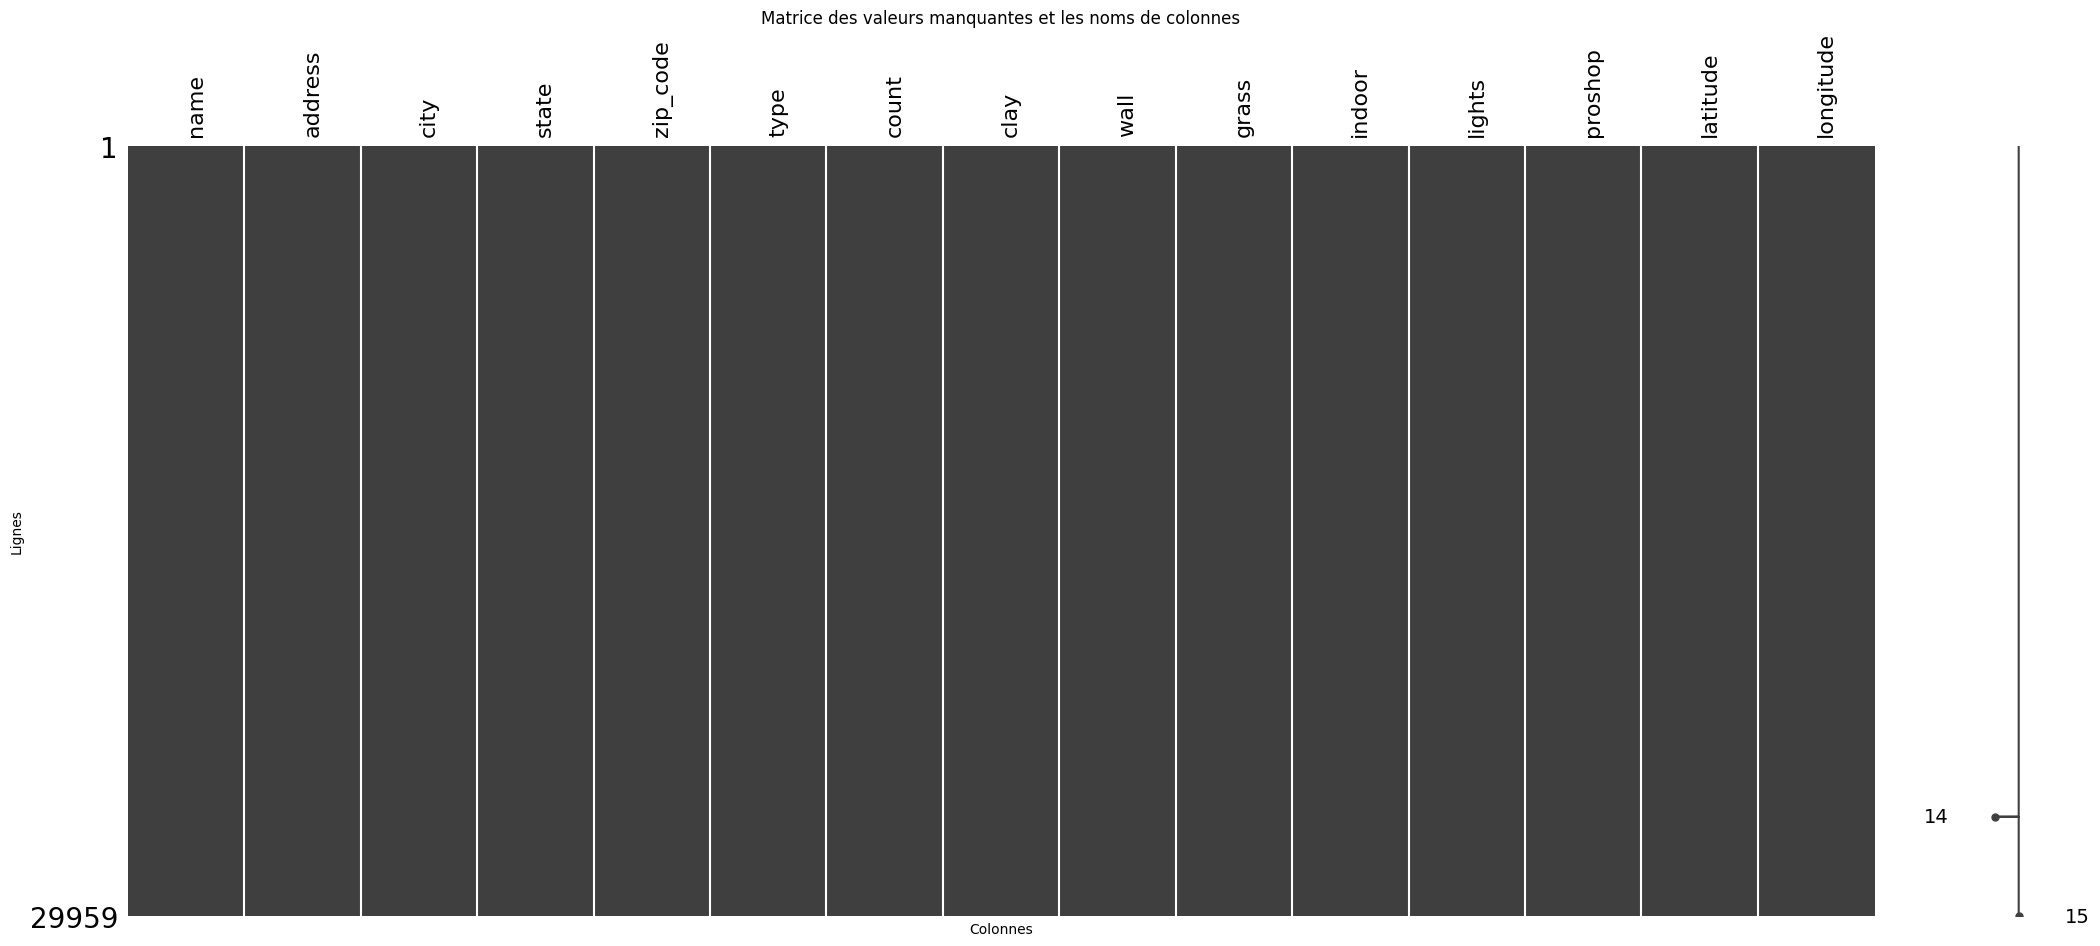

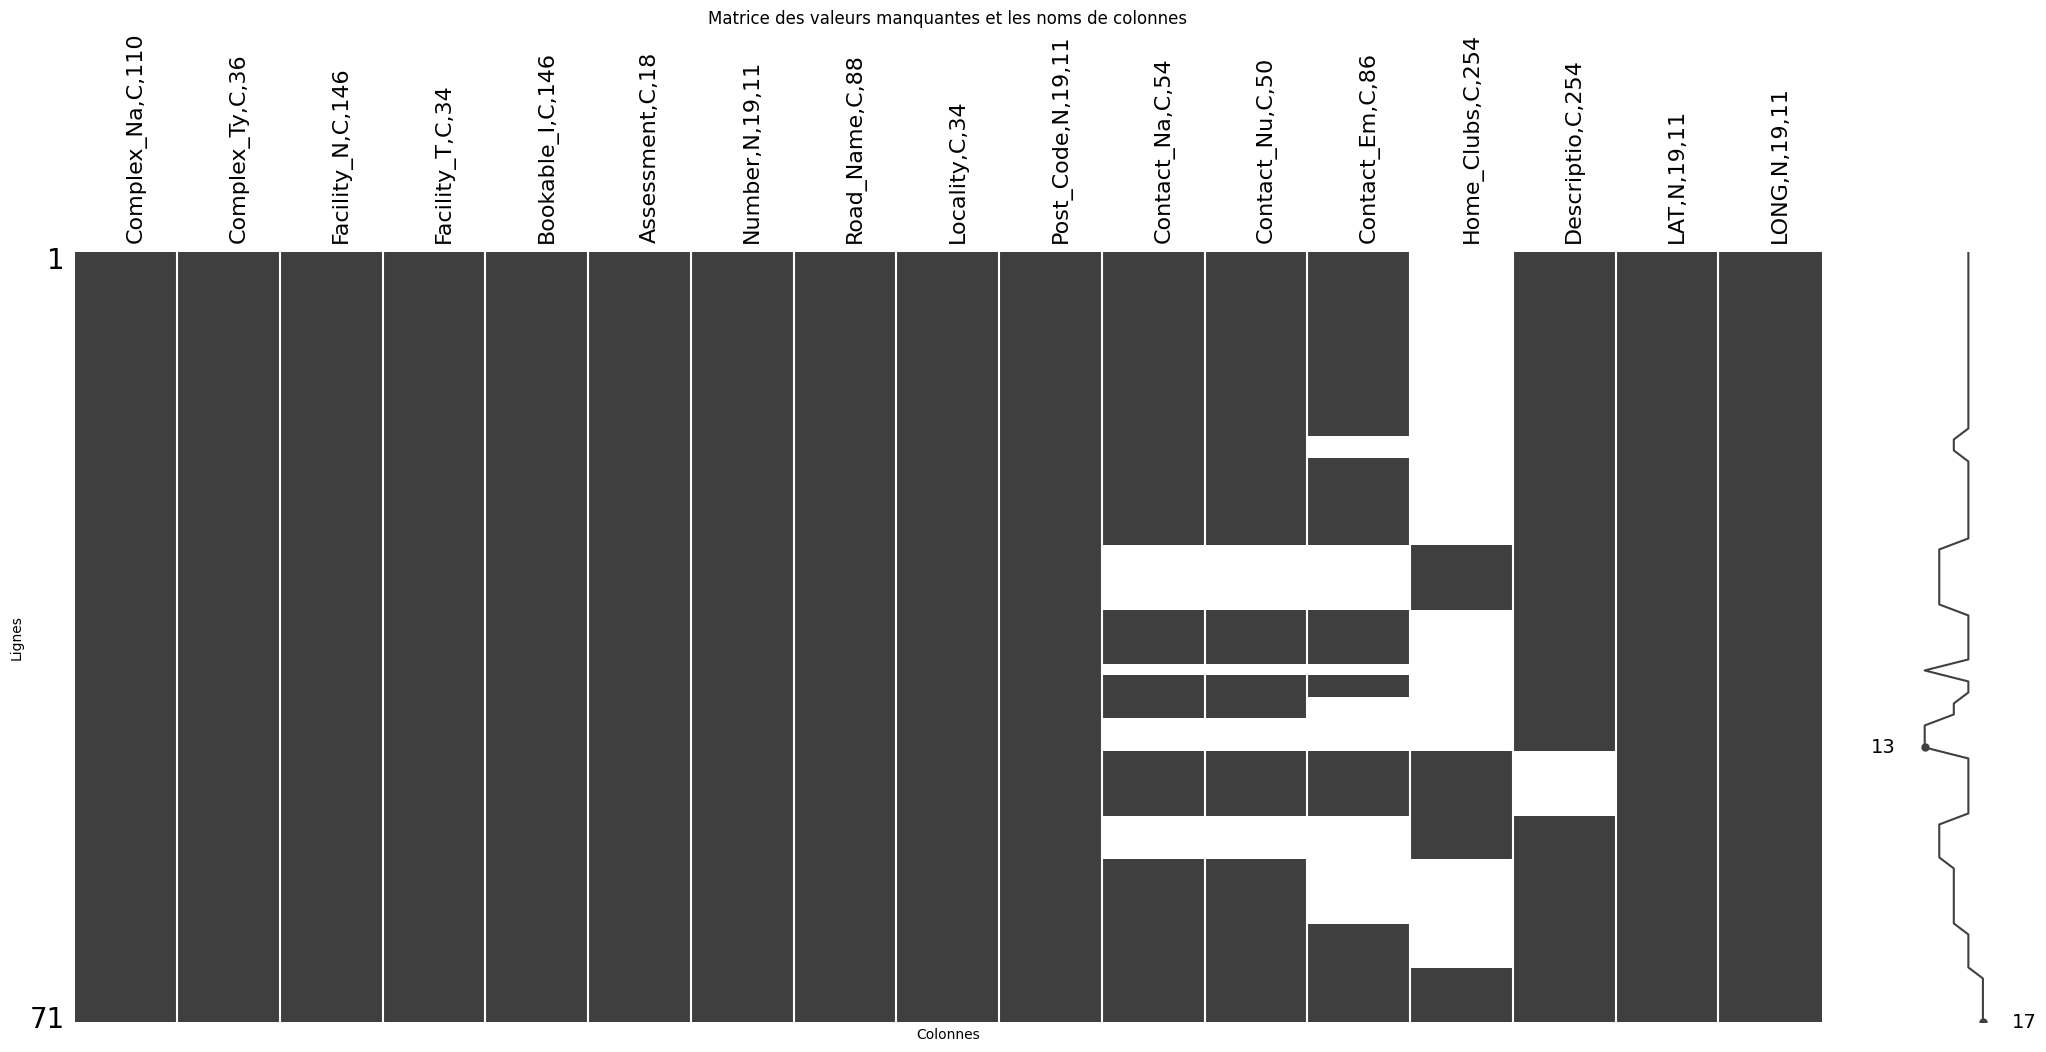

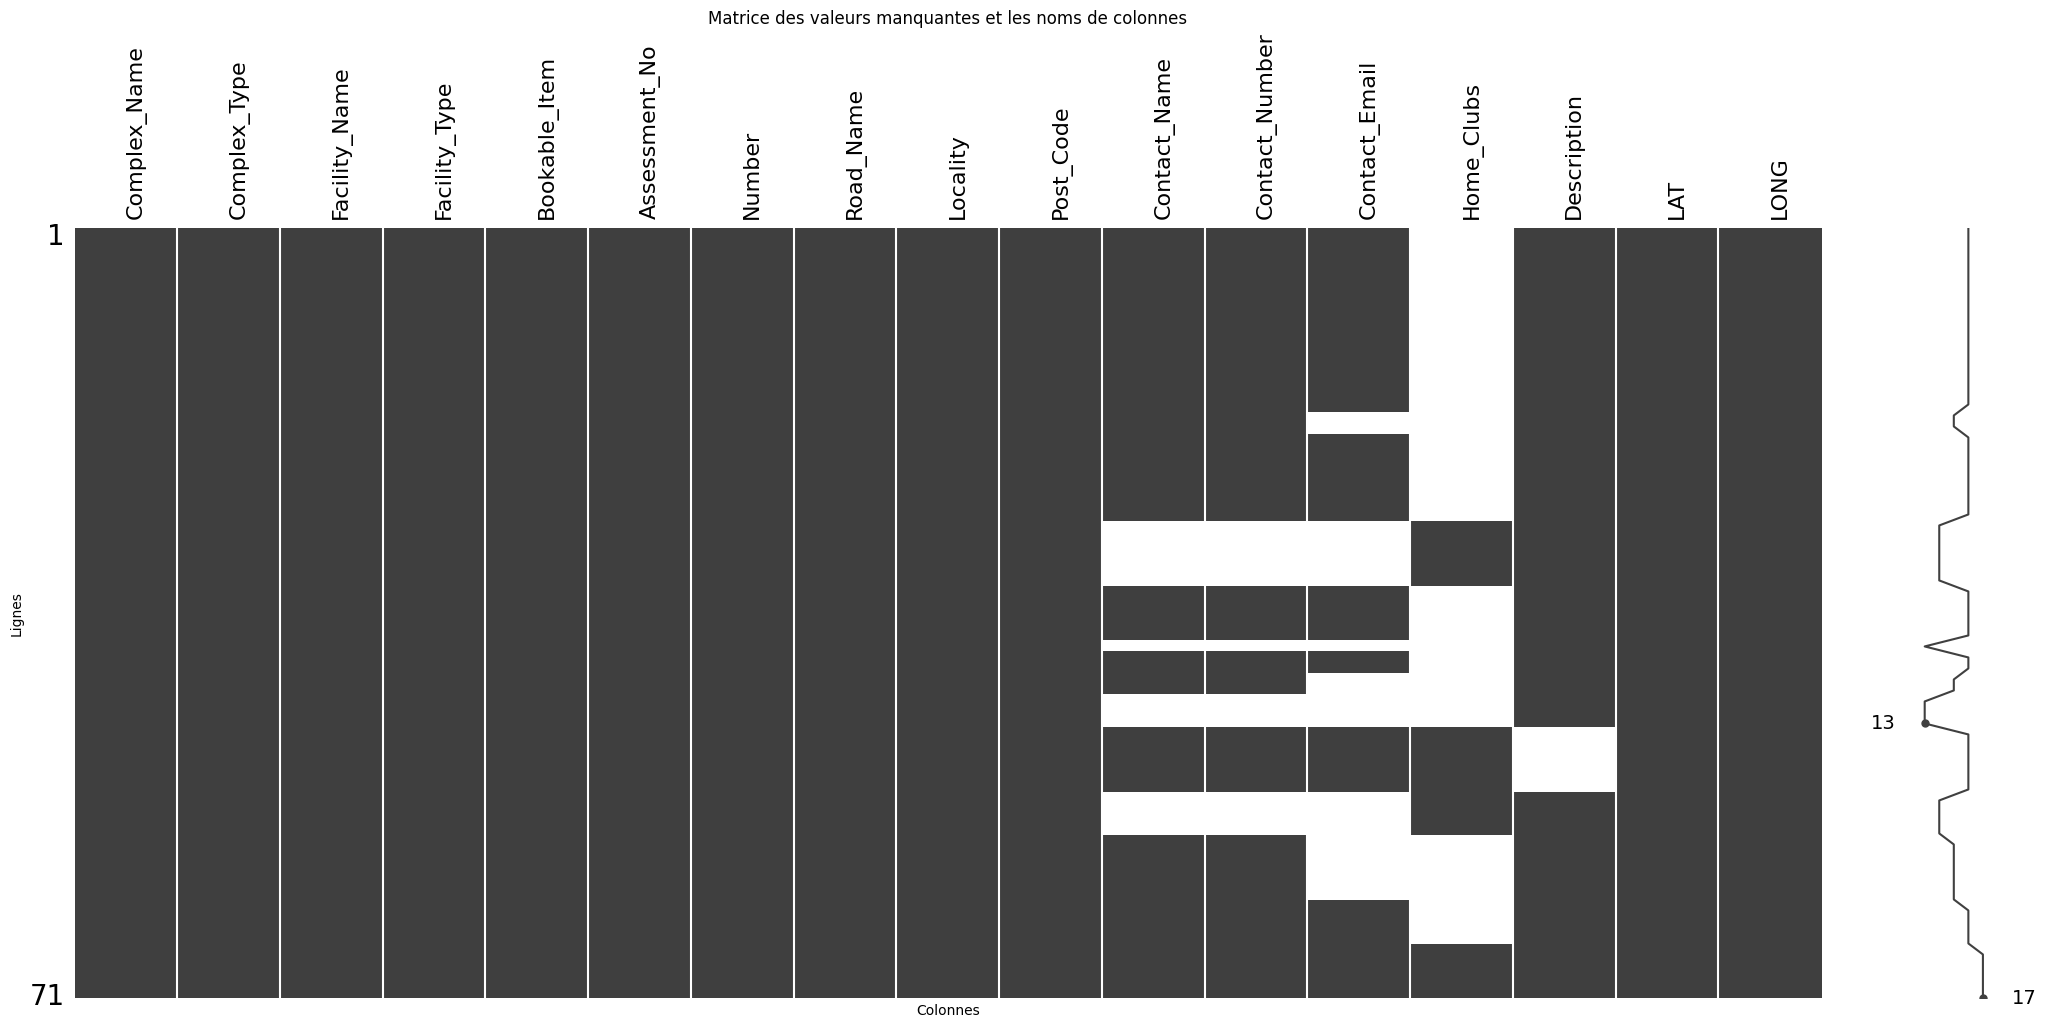

In [14]:
def profil_donnees(nom_data):
    msno.matrix(nom_data)
    noms_colonnes = nom_data.columns   
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)
    plt.show()
profil_donnees(df1)
profil_donnees(df2)
profil_donnees(df3)

In [15]:
df2

,"Complex_Na,C,110","Complex_Ty,C,36","Facility_N,C,146","Facility_T,C,34","Bookable_I,C,146","Assessment,C,18","Number,N,19,11","Road_Name,C,88","Locality,C,34","Post_Code,N,19,11","Contact_Na,C,54","Contact_Nu,C,50","Contact_Em,C,86","Home_Clubs,C,254","Descriptio,C,254","LAT,N,19,11","LONG,N,19,11"
0,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 1,41400036,1459,Rokewood-Skipton Road,Mannibadar,3360,Ken Sharpe,0438 154 193,khsharpe@bigpond.com,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,-37.760717,143.497898
1,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 2,41400036,1459,Rokewood-Skipton Road,Mannibadar,3360,Ken Sharpe,0438 154 193,khsharpe@bigpond.com,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,-37.760717,143.497898
2,Cape Clear Recreation Reserve,Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Tennis Court,Cape Clear Recreation Reserve Tennis Court,91000683,0,Recreation Road,Cape Clear,3351,Craig Cook,0400 477 493,vk3cmc@bigpond.com.au,NaN,Number of courts: 1\nSurface: Asphalt\nPublic ...,-37.791818,143.611632
3,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 1,66116405,396,Sago Hill Road,Haddon,3351,Peter Luke,0410 524 995,luke.peter.r@edumail.vic.gov.au,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,-37.588120,143.722213
4,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 2,66116405,396,Sago Hill Road,Haddon,3351,Peter Luke,0410 524 995,luke.peter.r@edumail.vic.gov.au,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,-37.588120,143.722213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 1,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\nSurface: Plexipave\nPubli...,-38.074414,144.235182
67,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 2,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\nSurface: Plexipave\nPubli...,-38.074414,144.235182
68,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 3,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\nSurface: Plexipave\nPubli...,-38.074414,144.235182
69,Sutherlands Creek Tennis Reserve,Recreation Reserve,Sutherlands Creek Tennis Reserve Tennis Courts,Tennis Court,Sutherlands Creek Tennis Reserve Tennis Court 1,41400828,841,Steiglitz Road,Sutherlands Creek,3331,Chris Kelly,0418 541 143,ckelly@australianmerino.net.au,Sutherlands Creek Tennis Club,Number of courts: 2\nSurface: Plexipave\nPubli...,-38.015530,144.227951


In [16]:
df3

,Complex_Name,Complex_Type,Facility_Name,Facility_Type,Bookable_Item,Assessment_No,Number,Road_Name,Locality,Post_Code,Contact_Name,Contact_Number,Contact_Email,Home_Clubs,Description,LAT,LONG
0,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 1,41400036,1459,Rokewood-Skipton Road,Mannibadar,3360,Ken Sharpe,0438 154 193,khsharpe@bigpond.com,NaN,Number of courts: 2\r\nSurface: Asphalt\r\nPub...,-37.760717,143.497898
1,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 2,41400036,1459,Rokewood-Skipton Road,Mannibadar,3360,Ken Sharpe,0438 154 193,khsharpe@bigpond.com,NaN,Number of courts: 2\r\nSurface: Asphalt\r\nPub...,-37.760717,143.497898
2,Cape Clear Recreation Reserve,Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Tennis Court,Cape Clear Recreation Reserve Tennis Court,91000683,0,Recreation Road,Cape Clear,3351,Craig Cook,0400 477 493,vk3cmc@bigpond.com.au,NaN,Number of courts: 1\r\nSurface: Asphalt\r\nPub...,-37.791818,143.611632
3,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 1,66116405,396,Sago Hill Road,Haddon,3351,Peter Luke,0410 524 995,luke.peter.r@edumail.vic.gov.au,NaN,Number of courts: 4\r\nSurface: Asphalt\r\nPub...,-37.588120,143.722213
4,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 2,66116405,396,Sago Hill Road,Haddon,3351,Peter Luke,0410 524 995,luke.peter.r@edumail.vic.gov.au,NaN,Number of courts: 4\r\nSurface: Asphalt\r\nPub...,-37.588120,143.722213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 1,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\r\nSurface: Plexipave\r\nP...,-38.074414,144.235182
67,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 2,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\r\nSurface: Plexipave\r\nP...,-38.074414,144.235182
68,Gheringhap Tennis Reserve,Recreation Reserve,Gheringhap Tennis Reserve Tennis Courts,Tennis Court,Gheringhap Tennis Reserve Tennis Court 3,43600430,79,Station Street,Gheringhap,3331,Les McInerney,0408 973 987,lmcinerney5@bigpond.com,Gheringhap Tennis Club,Number of courts: 3\r\nSurface: Plexipave\r\nP...,-38.074414,144.235182
69,Sutherlands Creek Tennis Reserve,Recreation Reserve,Sutherlands Creek Tennis Reserve Tennis Courts,Tennis Court,Sutherlands Creek Tennis Reserve Tennis Court 1,41400828,841,Steiglitz Road,Sutherlands Creek,3331,Chris Kelly,0418 541 143,ckelly@australianmerino.net.au,Sutherlands Creek Tennis Club,Number of courts: 2\r\nSurface: Plexipave\r\nP...,-38.015530,144.227951
